# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


Text(0.5, 1.0, 'bodíky')

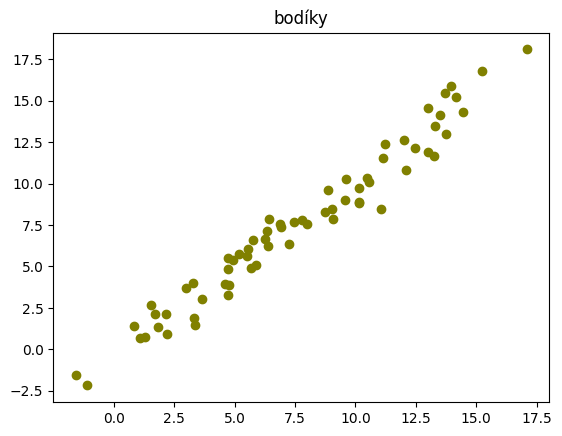

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

xx = np.linspace(0, 15, 66) + random.randn(66) 

plt.scatter(xx, xx + random.randn(len(xx)), color="olive")
plt.title("bodíky")


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


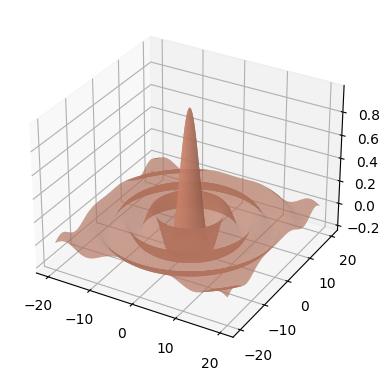

In [3]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-20, 20, 400)
y = np.linspace(-20, 20, 400)
X, Y = np.meshgrid(x, y)
Z = ((np.sin(np.sqrt(X**2 + Y**2))/ np.sqrt(X**2 + Y**2)))
Z = Z.T
fig = plt.figure(figsize=(40,10)) #urcuje sirku/vysku
ax = fig.add_subplot(2, 3, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, color="darksalmon")


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


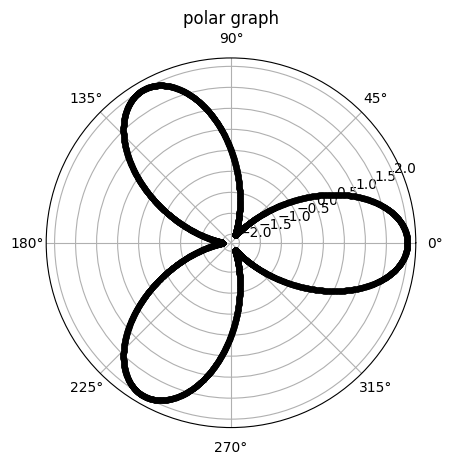

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
   
plt.axes(projection='polar')
 
rads = np.arange(0, 2 * np.pi, 0.001)  

for rad in rads:
    r = 2 * np.cos(3*rad)
    plt.polar(rad, r, 'k.')

plt.title("polar graph", color="black")
plt.show()



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0.5, 1.0, 'histogram')

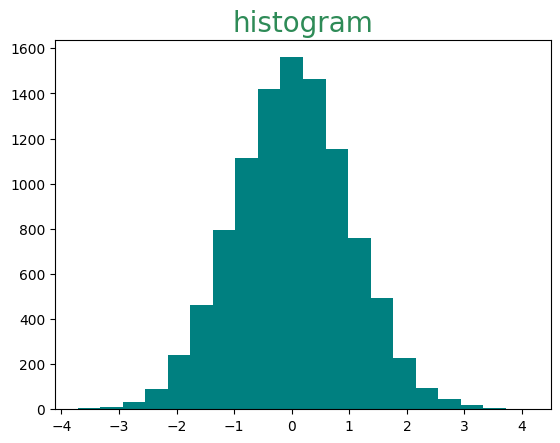

In [5]:
n = np.random.randn(10000)     
plt.hist(n, 20, color="teal") 
plt.title("histogram", color="seagreen", fontsize="20")


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


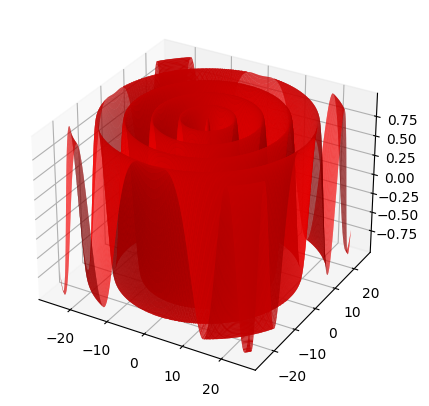

In [20]:
x = np.linspace(-25, 25, 300)
y = np.linspace(-25, 25, 300)
X, Y = np.meshgrid(x, y)
Z = (np.cos(np.sqrt(X**2 + Y**2)))
Z = Z.T
fig = plt.figure(figsize=(30,5)) #urcuje sirku/vysku
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, color="red")

In [15]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))
    x = n//2+1
    y = n//2+1
    A[x,y] = 1
    for i in range(0,n//2):
        A[x-i-1,(y+i):(y-i-2):-1] = np.arange((2*i+1)**2+1,(2*i+1)**2+2*i+3)
        A[(x-i):(x+i+2),y-i-1] = np.arange((2*i+1)**2+2*i+3,(2*i+1)**2+4*i+5)
        A[x+i+1,(y-i):(y+i+2)] = np.arange((2*i+1)**2+4*i+5,(2*i+1)**2+6*i+7)
        A[(x+i):(x-i-2):-1,y+i+1] = np.arange((2*i+1)**2+6*i+7,(2*i+3)**2+1)
    return A[1:-1,1:-1]

def integer_spiral(n):
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1 
    pos_col = n//2 + 1

    i = 1
    A[pos_row, pos_col] = i
    i += 1
    pos_row -= 1 

    while i <= n**2:
        A[pos_row, pos_col] = i
        i += 1 
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1 
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1 
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1 
        else:
            pos_row += 1 

    return A[1:-1, 1:-1] 


# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [16]:
import time


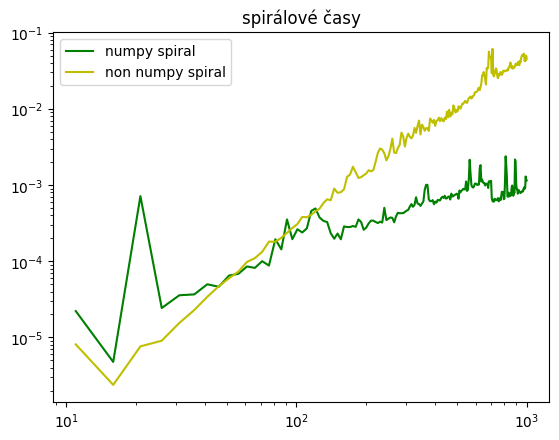

In [17]:
hodnoty=np.arange(11,1002,5)
t_spiral_np=np.zeros(len(hodnoty))
t_spiral=np.zeros(len(hodnoty))

for i in range(len(hodnoty)):
    start=time.time()
    integer_spiral_numpy(i)
    end=time.time()
    t_spiral_np[i]=end-start

for i in range(len(hodnoty)):
    start=time.time()
    integer_spiral(i)
    end=time.time()
    t_spiral[i]=end-start
fig, ax = plt.subplots(1, 1) 

x=0.1
y=0.1
ax.plot(hodnoty, t_spiral_np, color="green", label="numpy spiral")
ax.plot(hodnoty, t_spiral, color="y",label="non numpy spiral")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("spirálové časy")
ax.legend()


In [ ]:
#sklon vyjařuje míru růstu času v závislosti na velikosti i, určuje tak časovou složitost algoritmu

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.